# Introduction to GPT-4o

GPT-4o("옴니"의 "o"는 "옴니"를 의미)는 텍스트, 오디오 및 비디오 입력을 조합하여 처리하도록 설계되었으며 텍스트, 오디오 및 이미지 형식의 출력을 생성할 수 있습니다.

### Background

GPT-4o 이전에는 세 가지 개별 모델로 작동하는 음성 모드를 사용하여 ChatGPT와 상호작용할 수 있었습니다. GPT-4o는 이러한 기능을 텍스트, 시각, 오디오에 걸쳐 학습된 단일 모델로 통합합니다. 이러한 통합 접근 방식은 텍스트, 시각, 청각 등 모든 입력이 동일한 신경망에 의해 일관되게 처리되도록 보장합니다.

### Current API Capabilities

현재 API는 `{text, image}` 입력만 지원하며 `{text}` 출력은 `gpt-4-turbo`와 동일한 모달리티입니다. 오디오를 포함한 추가 모달리티는 곧 도입될 예정입니다. 이 가이드는 텍스트, 이미지 및 동영상 이해를 위한 GPT-4o 사용을 시작하는 데 도움이 될 것입니다.

## Setup Environments

In [1]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

## Chat Completion

첫 번째 요청에 대해 모델에 간단한 {text} 입력으로 시작해 보겠습니다. 첫 번째 요청에는 `system` 메시지와 `user` 메시지를 모두 사용하며, `assistant` 역할로부터 응답을 받겠습니다.

In [2]:
from openai import OpenAI 

MODEL="gpt-4o-mini"
client = OpenAI()

In [3]:
completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "너는 유용한 assistant 이다. 수학 숙제를 도와줘!"}, # <-- This is the system message that provides context to the model
    {"role": "user", "content": "안녕! (2+2)*8을 풀어줄래?"}  # <-- This is the user message for which the model will generate a response
  ]
)

print("Assistant: " + completion.choices[0].message.content)

Assistant: 안녕하세요! 주어진 수식 \((2+2) \times 8\)를 풀어보겠습니다.

1. 먼저 괄호 안의 값을 계산합니다: \(2 + 2 = 4\).
2. 그 다음, 4에 8을 곱합니다: \(4 \times 8 = 32\).

따라서, \((2+2) \times 8 = 32\)입니다!


## Image Processing
GPT-4o는 이미지를 직접 처리하고 이미지를 기반으로 지능적인 조치를 취할 수 있습니다. 두 가지 형식으로 이미지를 제공할 수 있습니다:
1. Base64 Encoded
2. URL

In [4]:
from IPython.display import Image, display, Audio, Markdown
import base64

./images/triangle.png: No such file or directory


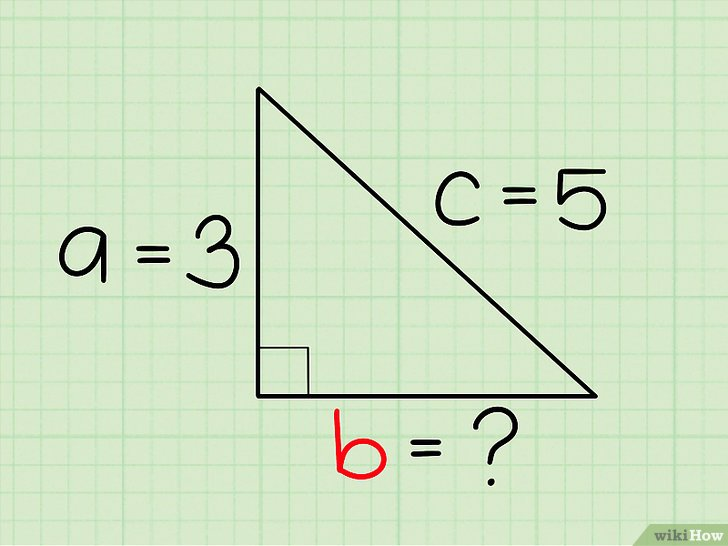

In [5]:
# 피타고라스 문제 이미지를 웹에서 불러오기
!mkdir data
!wget https://www.wikihow.com/images/thumb/a/a9/Use-the-Pythagorean-Theorem-Step-3-Version-3.jpg/v4-728px-Use-the-Pythagorean-Theorem-Step-3-Version-3.jpg -O ./images/triangle.png
IMAGE_PATH = "../dataset/triangle.png"

# Preview image for context
display(Image(IMAGE_PATH))

### Base64 Image Processing

In [6]:
# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "너는 마크다운으로 답을하는 유용한 assistant 이다. 수학 숙제를 도와줘!"},
        {"role": "user", "content": [
            {"type": "text", "text": "b의 값을 구해주고 계산 방법을 설명해줘"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

주어진 삼각형에서 \( a = 3 \), \( c = 5 \)입니다. 여기서 \( c \)는 빗변이고, \( a \)는 한 변입니다. \( b \)는 다른 변입니다. 피타고라스의 정리를 사용하여 \( b \)의 값을 구할 수 있습니다.

피타고라스의 정리는 다음과 같습니다:

\[
c^2 = a^2 + b^2
\]

이 식을 \( b \)에 대해 정리하면:

\[
b^2 = c^2 - a^2
\]

이제 주어진 값을 대입해 보겠습니다:

1. \( c = 5 \)이므로 \( c^2 = 5^2 = 25 \)
2. \( a = 3 \)이므로 \( a^2 = 3^2 = 9 \)

이제 \( b^2 \)를 계산합니다:

\[
b^2 = 25 - 9 = 16
\]

따라서 \( b \)는:

\[
b = \sqrt{16} = 4
\]

결론적으로, \( b \)의 값은 \( 4 \)입니다.


### URL Image Processing

In [7]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "당신은 마크다운으로 답을하는 유용한 assistant 이다. 수학 숙제를 도와줘!"},
        {"role": "user", "content": [
            {"type": "text", "text": "b의 값을 구해주고, 삼각형의 넓이를 구해줘?"},
            {"type": "image_url", "image_url": {
                "url": "https://www.wikihow.com/images/thumb/a/a9/Use-the-Pythagorean-Theorem-Step-3-Version-3.jpg/v4-728px-Use-the-Pythagorean-Theorem-Step-3-Version-3.jpg"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

주어진 삼각형은 직각삼각형입니다. 피타고라스의 정리를 사용하여 \( b \)의 값을 구할 수 있습니다.

피타고라스의 정리는 다음과 같습니다:

\[
c^2 = a^2 + b^2
\]

여기서 \( c = 5 \)이고 \( a = 3 \)입니다. 이를 대입하면:

\[
5^2 = 3^2 + b^2
\]

\[
25 = 9 + b^2
\]

\[
b^2 = 25 - 9
\]

\[
b^2 = 16
\]

\[
b = 4
\]

따라서 \( b \)의 값은 4입니다.

이제 삼각형의 넓이를 구해보겠습니다. 직각삼각형의 넓이는 다음과 같이 계산됩니다:

\[
\text{넓이} = \frac{1}{2} \times a \times b
\]

여기서 \( a = 3 \)이고 \( b = 4 \)이므로:

\[
\text{넓이} = \frac{1}{2} \times 3 \times 4 = \frac{12}{2} = 6
\]

따라서 삼각형의 넓이는 6입니다. 

결론적으로:
- \( b = 4 \)
- 삼각형의 넓이 = 6


## Video Processing

API로 동영상을 직접 전송할 수는 없지만, 프레임을 샘플링한 다음 이미지로 제공하면 GPT-4o는 동영상을 이해할 수 있습니다. 이 작업은 GPT-4 터보보다 더 잘 수행됩니다.API의 GPT-4o는 아직 오디오 인을 지원하지 않으므로(2024년 5월 기준), 제공된 비디오의 오디오와 비주얼을 모두 처리하기 위해 GPT-4o와 Whisper를 함께 사용하여 두 가지 사용 사례를 보여드리겠습니다:

1. Summarization (요약하기)
2. Question and Answering (질의응답)

### Youtube Video Download

In [22]:
%pip install pytubefix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pytubefix import YouTube 

SAVE_PATH = "./data"
link = "https://www.youtube.com/watch?v=h02ti0Bl6zk"

try: 
    yt = YouTube(link) 
except: 
    print("Connection Error") 

mp4_streams = yt.streams.filter(file_extension='mp4').first()
d_video = mp4_streams
try: 
    d_video.download(output_path=SAVE_PATH)
    print('Video downloaded successfully!')
except: 
    print("Some Error!")

### Setup for Video Processing

1. 기본 동영상 처리를 위해 두 가지 파이썬 패키지인 opencv-python과 moviepy를 사용하겠습니다.
2. 이를 위해서는 ffmpeg가 필요하므로 미리 설치하세요. MacOS의 경우 `brew install ffmpeg`, LinuxOS는 `sudo apt install ffmpeg`를 실행해야 할 수 있습니다.

### Video Preprocess: Frames & Audio
Video 전처리는 두가지 Component 요소인 Frames(연속적인 이미지 프레임)과 Audio(음성)를 처리해야 합니다.

In [28]:
#%pip install moviepy

In [15]:
import cv2
from moviepy.editor import VideoFileClip
#from moviepy import *
import time
import base64

# We'll be using the OpenAI DevDay Keynote Recap video. You can review the video here: https://www.youtube.com/watch?v=h02ti0Bl6zk
VIDEO_PATH = "data/OpenAI DevDay Keynote Recap.mp4"

In [17]:
def process_video(video_path, seconds_per_frame=2):
    base64Frames = []
    base_video_path, _ = os.path.splitext(video_path)

    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frames_to_skip = int(fps * seconds_per_frame)
    curr_frame=0

    # Loop through the video and extract frames at specified sampling rate
    while curr_frame < total_frames - 1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()
        if not success:
            break
        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frames_to_skip
    video.release()

    # Extract audio from video
    audio_path = f"{base_video_path}.mp3"
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path, bitrate="32k")
    clip.audio.close()
    clip.close()

    print(f"Extracted {len(base64Frames)} frames")
    print(f"Extracted audio to {audio_path}")
    return base64Frames, audio_path

# Extract 1 frame per second. You can adjust the `seconds_per_frame` parameter to change the sampling rate
base64Frames, audio_path = process_video(VIDEO_PATH, seconds_per_frame=1)

MoviePy - Writing audio in data/OpenAI DevDay Keynote Recap.mp3


MoviePy - Done.
Extracted 218 frames
Extracted audio to data/OpenAI DevDay Keynote Recap.mp3


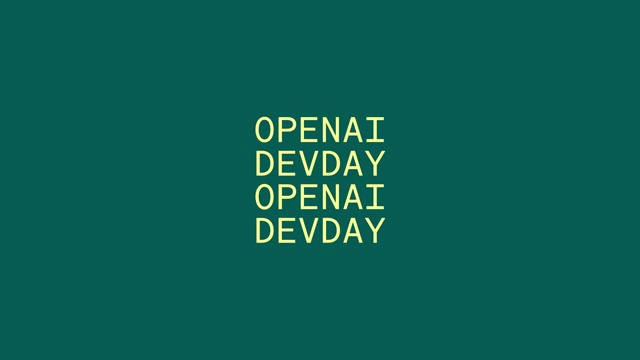

In [18]:
## Display the frames and audio for context
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
    time.sleep(0.025)

Audio(audio_path)

## 예제1. Summarization

이제 비디오 프레임과 오디오를 모두 확보했으므로 몇 가지 다른 테스트를 실행하여 비디오 요약을 생성하여 다양한 양식으로 모델을 사용한 결과를 비교해 보겠습니다. 모델이 비디오의 전체 컨텍스트를 사용할 수 있으므로 시각 및 오디오 입력의 컨텍스트를 모두 사용하여 생성된 요약이 가장 정확할 것으로 예상할 수 있습니다.

1. Visual Summary
2. Audio Summary
3. Visual + Audio Summary

### Visual Summary

Visual summary(시각적 요약)은 비디오의 프레임만 모델에 전송하여 생성됩니다. 프레임만 있으면 모델은 시각적인 측면을 포착할 수 있지만 화자가 설명한 세부 사항은 놓칠 수 있습니다.

In [19]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "너는 동영상 요약을 생성합니다. 동영상의 요약을 한글로 번역해서 마크다운으로 대답해줘"},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", 
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames)
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

### 동영상 요약

이 동영상은 OpenAI의 Dev Day 행사에 대한 내용을 담고 있습니다. 행사에서는 OpenAI의 최신 기술과 제품에 대한 발표가 이루어졌습니다. 주요 내용은 다음과 같습니다:

1. **OpenAI Dev Day 소개**: 행사 시작과 함께 OpenAI의 비전과 목표가 소개되었습니다.
2. **주요 발표**: 새로운 기능과 업데이트, 특히 GPT-4 Turbo와 DALL·E 3에 대한 설명이 있었습니다.
3. **기술 시연**: 다양한 기능이 실시간으로 시연되었으며, JSON 모드와 함수 호출 방식의 변화가 강조되었습니다.
4. **사용자 경험 향상**: 사용자에게 더 나은 제어와 지식을 제공하기 위한 새로운 기능들이 소개되었습니다.
5. **API 및 가격 정책**: OpenAI의 API 사용에 대한 정보와 가격 정책이 설명되었습니다.
6. **Q&A 세션**: 참석자들과의 질의응답 시간을 통해 궁금증을 해소하는 시간이 마련되었습니다.

이 행사는 OpenAI의 최신 기술을 공유하고, 개발자들이 이를 활용할 수 있는 방법을 제시하는 중요한 자리였습니다.


### Audio Summary

Audio summary(음성 요약)은 모델에 오디오 대본을 전송하여 생성됩니다. 오디오만 있으면 모델은 오디오 콘텐츠에 편향되어 프레젠테이션과 시각 자료가 제공하는 맥락을 놓칠 가능성이 높습니다.

GPT-4o에 대한 `{audio}` 입력은 현재 제공되지 않아 기존의 `whisper-1` 모델을 사용하여 오디오를 처리했습니다.

In [20]:
# Transcribe the audio
transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb"),
)
## 옵션: 자막 출력하기를 하고 싶다면
#print("Transcript: ", transcription.text + "\n\n")

response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""너는 자막의 요약본을 생성합니다. 제공된 자막의 요약을 한글로 작성하고 마크다운으로 응답해줘."""},
    {"role": "user", "content": [
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

# OpenAI Dev Day 요약

OpenAI Dev Day에서 새로운 모델인 GPT-4 Turbo가 출시되었습니다. 이 모델은 최대 128,000개의 토큰을 지원하며, JSON 모드라는 새로운 기능을 통해 유효한 JSON 형식으로 응답할 수 있습니다. 여러 기능을 동시에 호출할 수 있으며, 지침을 더 잘 따르는 성능을 보여줍니다. 

또한, 외부 문서나 데이터베이스에서 지식을 가져올 수 있는 검색 기능이 도입되었습니다. GPT-4 Turbo는 2023년 4월까지의 세계 지식을 가지고 있으며, 지속적으로 개선될 예정입니다. Dolly 3, GPT-4 Turbo with Vision, 그리고 새로운 텍스트 음성 변환 모델도 API에 추가되었습니다.

새로운 프로그램인 Custom Models도 시작되며, 연구자들이 기업과 협력하여 맞춤형 모델을 개발할 수 있도록 지원합니다. 기존 GPT-4 고객을 위해 분당 토큰 수를 두 배로 늘리고, GPT-4 Turbo는 GPT-4보다 프롬프트 토큰은 3배, 완료 토큰은 2배 저렴합니다.

GPTs는 특정 목적에 맞춘 맞춤형 ChatGPT로, 대화만으로 프로그래밍할 수 있어 코딩 지식이 없는 사용자도 쉽게 사용할 수 있습니다. 개인 GPT를 만들거나, 링크를 통해 공개할 수 있으며, 기업 전용 GPT도 생성할 수 있습니다. 이달 말에는 GPT Store가 출시될 예정입니다.

API에도 동일한 개념이 적용되어, 지속적인 스레드, 내장 검색, 코드 해석기, 작동하는 파이썬 인터프리터 등이 포함됩니다. 인공지능이 통합됨에 따라 모두가 즉시 사용할 수 있는 슈퍼파워를 가지게 될 것입니다. 

OpenAI는 앞으로의 발전을 기대하며, 내년에도 다시 만날 것을 희망합니다. 오늘 발표된 내용은 앞으로의 발전에 비하면 소박하게 느껴질 것입니다.


### Audio + Visual Summary

오디오+비주얼 요약(Audio + Visual summary)은 비디오의 비주얼과 오디오를 한 번에 모델에 전송하여 생성됩니다. 이 두 가지를 모두 전송하면 모델이 전체 동영상을 한 번에 인식할 수 있으므로 요약이 더 잘 될 것으로 예상됩니다.

In [21]:
## Generate a summary with visual and audio
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""너는 동영상 요약을 생성합니다. 제공된 동영상의 요약과 대본을 한글로 번역하고 마크다운으로 응답해줘."""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", 
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
],
    temperature=0,
)
print(response.choices[0].message.content)

# OpenAI Dev Day 요약

## 개요
OpenAI의 첫 번째 Dev Day에서 새로운 모델인 GPT-4 Turbo가 출시되었습니다. 이 모델은 최대 128,000 토큰의 컨텍스트를 지원하며, JSON 모드라는 새로운 기능이 추가되어 모델이 유효한 JSON으로 응답하도록 보장합니다.

## 주요 기능
- **다중 함수 호출**: 여러 함수를 동시에 호출할 수 있으며, 일반적으로 지침을 따르는 데 더 나은 성능을 보입니다.
- **정보 검색 기능**: 외부 문서나 데이터베이스에서 지식을 가져올 수 있는 기능이 추가되었습니다.
- **지식 업데이트**: GPT-4 Turbo는 2023년 4월까지의 세계에 대한 지식을 가지고 있으며, 지속적으로 개선될 예정입니다.

## API 업데이트
- **DALL·E 3, GPT-4 Turbo with Vision, Text-to-Speech 모델**이 API에 추가되었습니다.
- **커스텀 모델**: 기업과 협력하여 특정 용도에 맞는 커스텀 모델을 개발할 수 있는 프로그램이 시작되었습니다.
- **토큰 한도 증가**: 기존 GPT-4 고객을 위해 분당 토큰 수를 두 배로 늘려 더 많은 작업을 쉽게 수행할 수 있도록 했습니다.
- **비용 절감**: GPT-4 Turbo는 프롬프트 토큰에 대해 3배, 완료 토큰에 대해 2배 저렴합니다.

## GPTs 소개
GPTs는 특정 목적에 맞게 조정된 ChatGPT의 버전으로, 지침, 확장된 지식 및 작업을 결합하여 더 유용하게 사용할 수 있습니다. 코딩을 모르는 사용자도 대화만으로 GPT를 프로그래밍할 수 있으며, 개인 GPT를 만들거나 공개 링크를 통해 공유할 수 있습니다.

## API의 새로운 기능
- **지속적인 스레드**: 긴 대화 기록을 처리할 필요 없이 지속적인 스레드를 지원합니다.
- **코드 인터프리터**: 샌드박스 환경에서 작동하는 Python 인터프리터가 포함되어 있습니다.
- **개선된 함수 호출**: 더 나은 기능 호출을 지원합니다.

## 결론
Ope

## 예제 2: Question & Answering

Q&A에서는 이전과 동일한 개념을 사용하여 처리된 동영상에 대해 질문하면서 입력 양식 결합의 이점을 보여주기 위해 동일한 3가지 테스트를 실행합니다:

1. Visual Q&A
2. Audio Q&A
3. Visual + Audio Q&A 

In [22]:
QUESTION = "Question: 샘 알트먼은 왜 창문을 올리고 라디오를 켜는 것에 대한 예를 들었어?"

### Visual Q&A

In [23]:
qa_visual_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "동영상을 사용하여 제공된 질문의 답을 한글로 번역하고 마크다운으로 응답하세요."},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        QUESTION
        ],
    }
    ],
    temperature=0,
)
print("Visual QA:\n" + qa_visual_response.choices[0].message.content)

Visual QA:
샘 알트먼은 창문을 올리고 라디오를 켜는 예를 통해 AI의 기능을 설명하고, 사용자가 자연어로 명령을 내릴 수 있는 방식을 보여주기 위해 이 예를 들었습니다. 이는 AI가 사용자의 의도를 이해하고, 여러 작업을 동시에 수행할 수 있는 능력을 강조하는 데 도움이 됩니다.


### Audio Q&A

In [24]:
qa_audio_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""음성과 자막을 사용하여 질문의 답을 한글로 번역하고 마크다운으로 응답해줘."""},
    {"role": "user", "content": f"The audio transcription is: {transcription.text}. \n\n {QUESTION}"},
    ],
    temperature=0,
)
print("Audio QA:\n" + qa_audio_response.choices[0].message.content)

Audio QA:
샘 알트먼은 창문을 올리고 라디오를 켜는 것에 대한 예를 통해, 사람들이 기술을 사용하여 더 나은 경험을 만들 수 있는 방법을 설명하고자 했습니다. 이러한 비유는 기술이 우리의 일상생활에 어떻게 통합될 수 있는지를 보여주며, 사용자가 원하는 정보를 쉽게 얻고, 더 나은 상호작용을 할 수 있도록 돕는다는 메시지를 전달합니다. 

이와 같은 예시는 기술이 단순한 도구가 아니라, 우리의 삶을 향상시키는 중요한 요소임을 강조합니다.


### Visual + Audio Q&A

In [25]:
qa_both_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""동영상과 녹취록을 사용하여 제공된 질문을 한글로 답해줘."""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", 
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
                        {"type": "text", "text": f"The audio transcription is: {transcription.text}"},
        QUESTION
        ],
    }
    ],
    temperature=0,
)
print("Both QA:\n" + qa_both_response.choices[0].message.content)

Both QA:
샘 알트먼이 창문을 올리고 라디오를 켜는 예를 든 이유는 새로운 기능 호출 방식의 예시로, 사용자가 자연어로 명령을 내릴 때 모델이 더 잘 이해하고 실행할 수 있도록 하기 위해서입니다. 이 예시는 모델이 여러 작업을 동시에 수행할 수 있는 능력을 강조하며, 사용자가 보다 직관적으로 상호작용할 수 있도록 돕기 위한 것입니다.


## Create Transcript

In [8]:
audio_file = open("../dataset/Interview_Sample_01.wav", "rb")
transcript = client.audio.transcriptions.create(
    file=audio_file,
    model="whisper-1",
    language="ko",
    response_format="srt",  # 자막 포맷
    temperature=0.0,
)

In [9]:
print(transcript)

1
00:00:00,000 --> 00:00:07,000
지금 생각해보면 가장 기억에 남는 것이 외환위기 때의 경험입니다.

2
00:00:07,000 --> 00:00:13,000
외환위기 때 나라뿐 아니라 회사에서는 달러가 많이 부족했고

3
00:00:13,000 --> 00:00:19,000
우리는 수출을 하기 위해서 원자재라든지 대금지급

4
00:00:19,000 --> 00:00:23,000
혹은 또 우리가 수출한 물건에 대한 대금을 받아야 되는 상황이었습니다.

5
00:00:23,000 --> 00:00:29,000
일단은 우리가 해외로부터 받아야 될 때는 최대한 그것을 달러로 받았고

6
00:00:29,000 --> 00:00:36,000
반대로 우리가 지불해야 될 것은 가능한 한 원자재를 통해서 지급을 했습니다.

7
00:00:36,000 --> 00:00:40,000
그 원자재라는 것이 결국은 반도체 쪽이었는데

8
00:00:40,000 --> 00:00:46,000
우리나라에서 가장 나름 손쉽게 구하면서도 꼭 필요한 제품인 반도체를

9
00:00:46,000 --> 00:00:48,000
원자재값 대응으로 물건을 주면서

10
00:00:48,000 --> 00:00:53,000
반대로 해외에서 우리가 받아야 될 것은 달러로 받으면서

11
00:00:53,000 --> 00:00:57,000
그 환율차를 가장 줄일 수가 있었습니다.

12
00:00:57,000 --> 00:01:06,000
그것으로 인해서 약 6개월 동안에 나름 회사에서는 달러 지출을 막을 수 있었고

13
00:01:06,000 --> 00:01:15,000
그때 그나마 달러를 회사에서 확보를 해서 나름의 위기를 극복할 수 있었던 것으로 생각합니다.



